# RAPORT 1, Jakub Ciągło, Mateusz Ćwiek

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import pandas as pd

n = 1000

## Zadanie 2 - Generowanie rozkładu normalnego

In [42]:
def plot_pdf_cdf(data, mu=0, sigma=1):
    
    x_theor = np.linspace(min(data), max(data), n)
    y_theor_pdf = norm.pdf(x_theor, mu, sigma)
    y_theor_cdf = norm.cdf(x_theor, mu, sigma)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x_theor, y_theor_cdf, label="dystrybuanta teoretyczna")
    sns.ecdfplot(data, label="dystrybuanta empiryczna")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x_theor, y_theor_pdf, color="r", label="gęstość teoretyczna")
    sns.histplot(data, kde=True, stat="density", label="gęstość empiryczna")
    plt.legend()
    plt.suptitle(f"Rozkład normalny N({mu}, {sigma})", fontsize=16)
    plt.show()


In [5]:
mu = 0
sigma = 1

### Pierwszy krok - dotychczasowe implementacje

1) Metoda odwrotnej dystrybuanty

In [43]:
def normal(mu, sigma, n):
    U = np.random.rand(n)
    Z = norm.ppf(U)
    return mu + sigma * Z

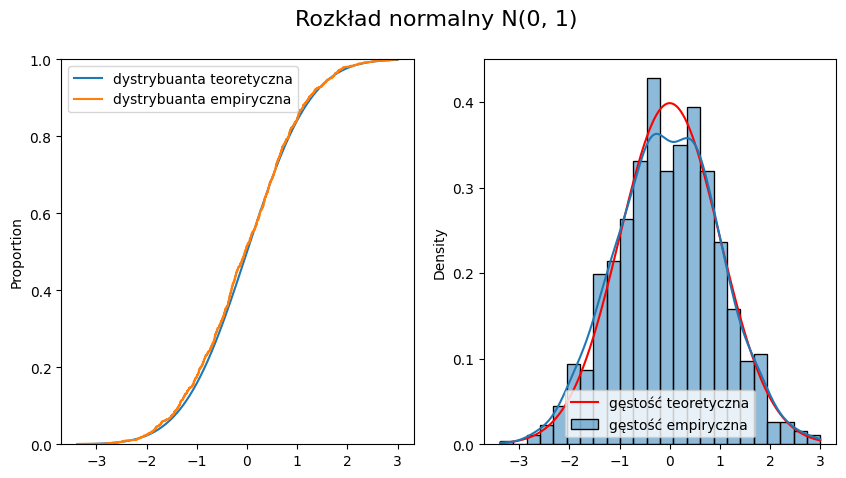

In [44]:
generated_normal = normal(mu, sigma, n)

plot_pdf_cdf(generated_normal)

2. Metoda Boxa-Mullera.

In [28]:
def BoxMuller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)
    factor = np.sqrt(-2 * np.log(U1))
    X = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Y = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return X, Y

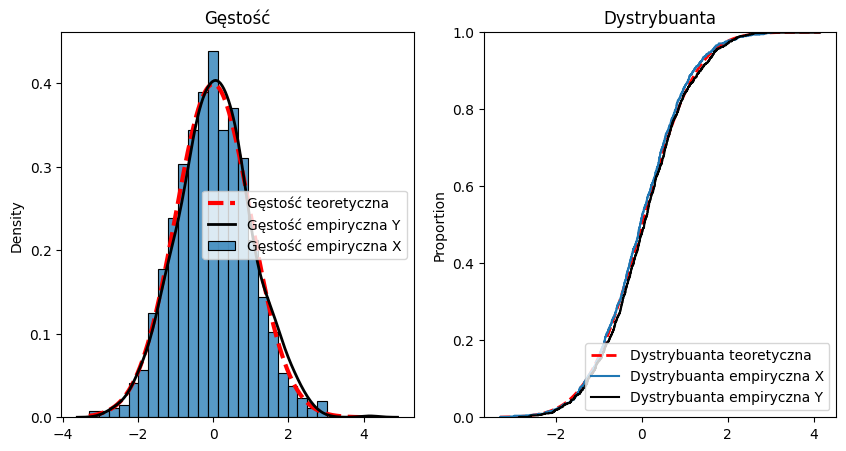

In [29]:
x, y = BoxMuller(n)

x_theor = np.linspace(min(np.concatenate([x, y])), max(np.concatenate([x, y])), n)
y_theor_cdf = norm.cdf(x_theor, 0, 1)
y_theor_pdf = norm.pdf(x_theor, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

3. Metoda biegunowa Boxa-Mullera.

In [31]:
def polar_BoxMuller(n):
    samples_x = []
    samples_y = []
    while len(samples_x) < n:
        V1 = np.random.uniform(-1, 1)
        V2 = np.random.uniform(-1, 1)
        R2 = V1**2 + V2**2
        if R2 <= 1 and R2 > 0:
            factor = np.sqrt(-2 * np.log(R2) / R2)
            samples_x.append(V1 * factor)
            samples_y.append(V2 * factor)
    return np.array(samples_x), np.array(samples_y)

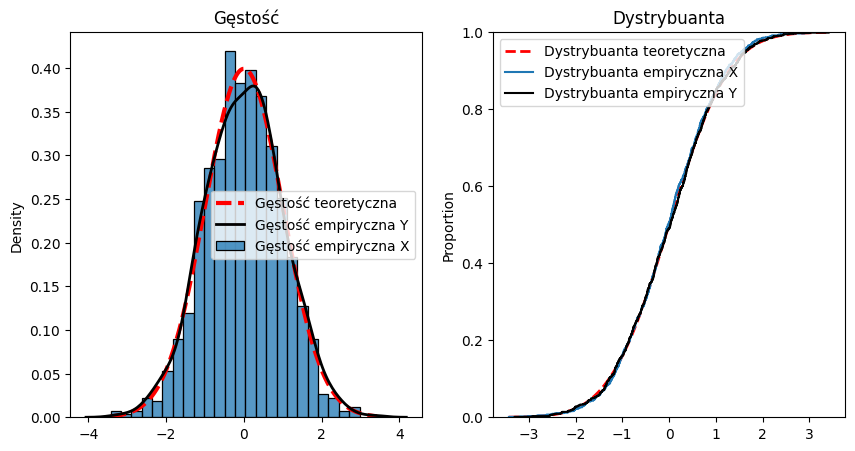

In [32]:
x, y = polar_BoxMuller(n)

x_theor = np.linspace(min(np.concatenate([x, y])), max(np.concatenate([x, y])), n)
y_theor_cdf = norm.cdf(x_theor, 0, 1)
y_theor_pdf = norm.pdf(x_theor, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

4. Przyspieszony algorytm biegunowej metody, korzystając ze źródła https://quantgirl.blog/comparing-box-muller-and-marsaglia-bray/.

In [33]:
p = np.pi / 4
aux = p * (1 - p)


def polar_BoxMuller(n):
    x = (3 * math.sqrt(aux) + math.sqrt(9 * aux + p * n)) / p
    N = math.ceil(x * x)

    w1 = np.random.rand(N) * 2 - 1
    w2 = np.random.rand(N) * 2 - 1
    s = w1 * w1 + w2 * w2

    index = s < 1

    w1 = w1[index][:n]
    w2 = w2[index][:n]
    s = s[index][:n]

    t = np.sqrt(-2 * np.log(s) / s)
    z1 = w1 * t
    z2 = w2 * t

    return z1, z2

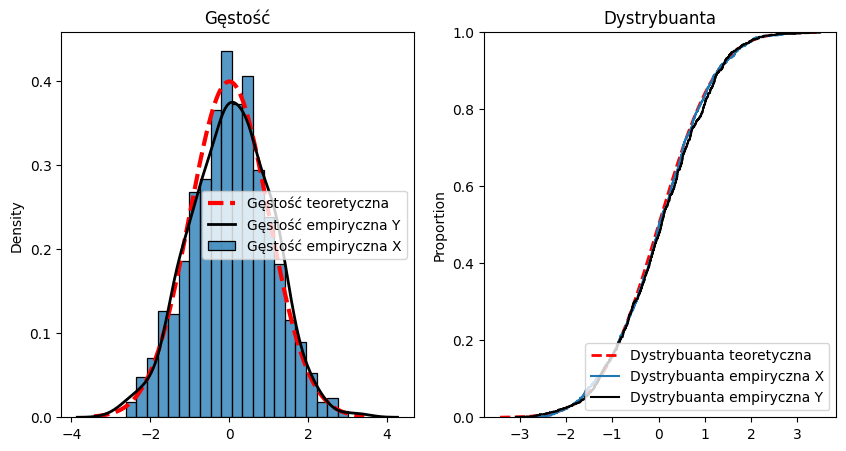

In [34]:
x, y = polar_BoxMuller(n)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(
    x_theor, y_theor_pdf, linestyle="dashed", color="r", linewidth=3, label="Gęstość teoretyczna"
)
sns.histplot(x, stat="density", label="Gęstość empiryczna X")
sns.kdeplot(y, label="Gęstość empiryczna Y", color="k", linewidth=2)
plt.title("Gęstość")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(
    x_theor, y_theor_cdf, linestyle="dashed", color="r", linewidth=2, label="Dystrybuanta teoretyczna"
)
sns.ecdfplot(x, label="Dystrybuanta empiryczna X")
sns.ecdfplot(y, color="k", label="Dystrybuanta empiryczna Y")
plt.title("Dystrybuanta")
plt.legend()
plt.show()

### Drugi krok - dodatkowe metody generowania rozkładu normalnego.

1. Metoda tuzina.

In [35]:
def tuzin(mu, sigma):
    U = np.random.uniform(0, 1, 12)
    S = np.sum(U)
    X = S - 6
    return sigma * X + mu

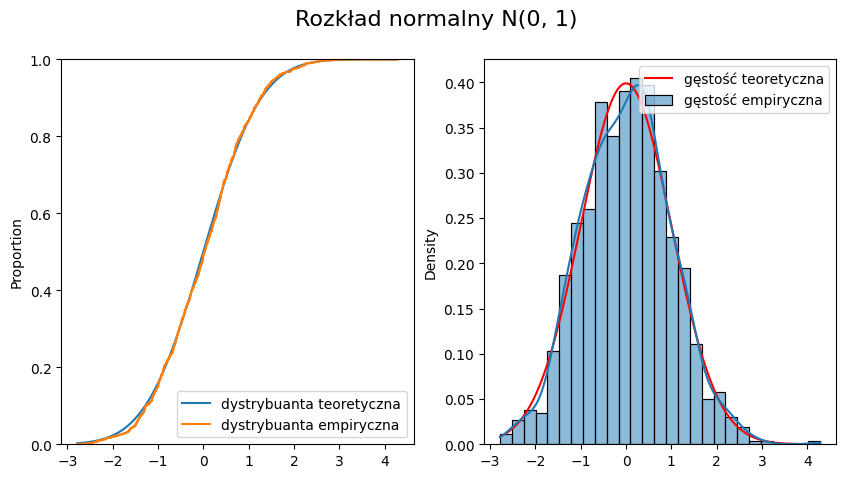

In [45]:
generated_tuzin = np.zeros(n)
for i in range(n):
    generated_tuzin[i] = tuzin(mu, sigma)

plot_pdf_cdf(generated_tuzin)

2. Metoda zigguratu.

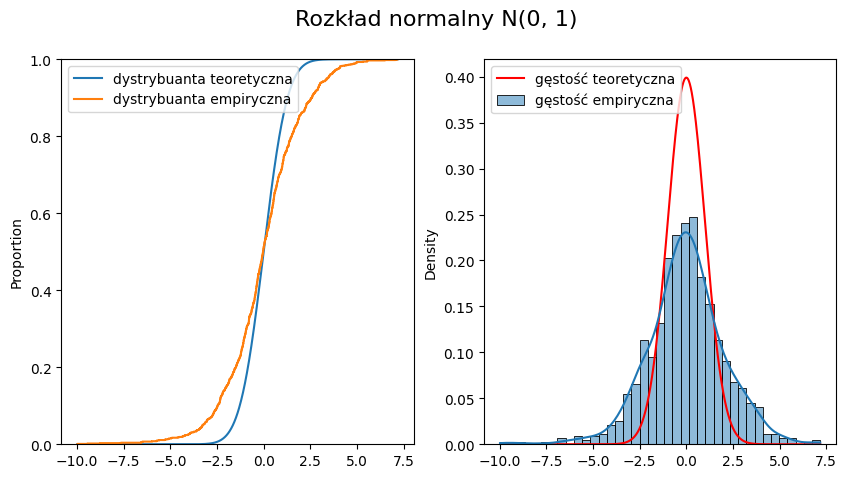

In [56]:
def exponential():
    """Generuje wartość z rozkładu wykładniczego."""
    return -np.log(np.random.uniform())

def ziggurat(n_samples, n_steps):
    """Generuje próbki z rozkładu normalnego używając metody Zigguratu."""
    v = 3.0  # Objętość podstawowa
    x_values = np.linspace(0, 10, n_steps+1)
    samples = []

    while len(samples) < n_samples:
        i = np.random.randint(0, n_steps)
        x = np.random.uniform(x_values[i], x_values[i+1])
        # Użycie funkcji exponential do porównania z y
        y = np.random.uniform(0, np.exp(-exponential()))

        if y < np.exp(-x):
            samples.append(x if np.random.rand() > 0.5 else -x)

    return np.array(samples)

generated_ziggurat = ziggurat(n,n)
plot_pdf_cdf(generated_ziggurat)

## Zadanie 3 - metody redukcji wariancji.

### Krok 1 - metodą Monte Carlo oblicz całkę 
$$
\int_0^1 \frac{4}{1 + x^2} \, dx
$$
(szacowanie liczby $\pi$).

In [140]:
def monte_carlo_integrate(func, a, b, num_points):
    x_samples = np.random.uniform(a, b, num_points)

    f_x = func(x_samples)
    average = np.mean(f_x)

    return average * (b - a)

def func(x):
    return 4 / (1 + x ** 2)

a = 0
b = 1

result = monte_carlo_integrate(func, a, b, n)
print("Wynik Monte Carlo:", result)


Wynik Monte Carlo: 3.1441846220782907


### Krok 2 - stosujemy metodę redukcji wariancji do ponownego obliczenia zadanej całki. 
 My wybieramy metodę odbić lustrzanych - antithetic variates.

In [141]:
def monte_carlo_antithetic(func, a, b, num_points):
    x_samples = np.random.uniform(a, b, num_points)
    # Obliczamy odbicia lustrzane dla x
    x_mirror = b + a - x_samples
    
    f_x = func(x_samples)
    f_x_mirror = func(x_mirror)
    
    average = np.mean((f_x + f_x_mirror) / 2)
    
    return average * (b - a)

result_antithetic = monte_carlo_antithetic(func, a, b, n)
print("Wynik Monte Carlo za pomocą metody odbić lustrzanych:", result_antithetic)


Wynik Monte Carlo za pomocą metody odbić lustrzanych: 3.1415105804643804


### Krok 3 - analiza błędu względem ilości symulacji dla obu metod.

In [126]:
sample_sizes = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]

results_antithetic = {"Sample Size": [], "MC Estimate (Antithetic)": [], "Absolute Error (Antithetic)": []}
results_plain_mc = {"Sample Size": [], "MC Estimate (Plain)": [], "Absolute Error (Plain)": []}

for n in sample_sizes:
    estimate_antithetic = monte_carlo_antithetic(func, 0, 1, n)
    absolute_error_antithetic = np.abs(estimate_antithetic - np.pi)
    results_antithetic["Sample Size"].append(n)
    results_antithetic["MC Estimate (Antithetic)"].append(estimate_antithetic)
    results_antithetic["Absolute Error (Antithetic)"].append(absolute_error_antithetic)

    estimate_plain = monte_carlo_integrate(func, 0, 1, n)
    absolute_error_plain = np.abs(estimate_plain - np.pi)
    results_plain_mc["Sample Size"].append(n)
    results_plain_mc["MC Estimate (Plain)"].append(estimate_plain)
    results_plain_mc["Absolute Error (Plain)"].append(absolute_error_plain)

results_df = pd.DataFrame(results_antithetic)
results_plain_mc_df = pd.DataFrame(results_plain_mc)
comparison_df = pd.merge(results_plain_mc_df, results_df, on="Sample Size")
comparison_df

,Sample Size,MC Estimate (Plain),Absolute Error (Plain),MC Estimate (Antithetic),Absolute Error (Antithetic)
0,100,3.234446,0.092853,3.142322,0.000729
1,500,3.146908,0.005315,3.142919,0.001326
2,1000,3.154804,0.013212,3.139993,0.001599
3,5000,3.157494,0.015902,3.141685,0.000092
4,10000,3.142643,0.001050,3.141472,0.000120
5,20000,3.137602,0.003991,3.140794,0.000798
6,50000,3.143291,0.001699,3.141427,0.000166
7,100000,3.143810,0.002218,3.141534,0.000058


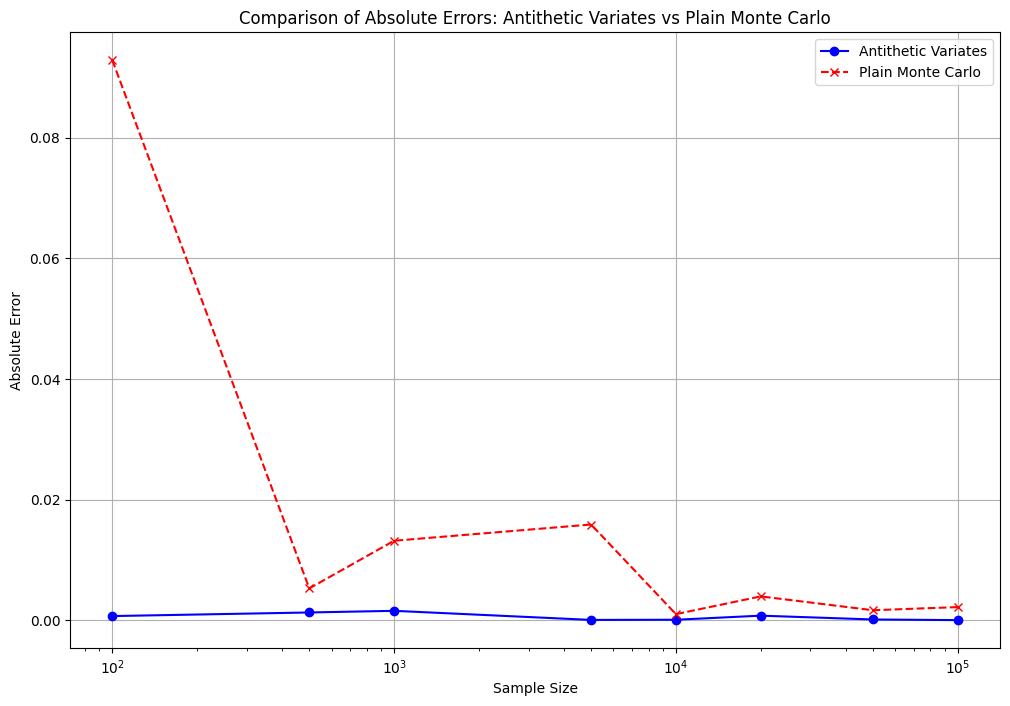

In [129]:
plt.figure(figsize=(12, 8))
plt.plot(comparison_df["Sample Size"], comparison_df["Absolute Error (Antithetic)"], marker='o', linestyle='-', color='b', label='Antithetic Variates')
plt.plot(comparison_df["Sample Size"], comparison_df["Absolute Error (Plain)"], marker='x', linestyle='--', color='r', label='Plain Monte Carlo')
plt.title("Comparison of Absolute Errors: Antithetic Variates vs Plain Monte Carlo")
plt.xlabel("Sample Size")
plt.ylabel("Absolute Error")
plt.xscale("log")  
plt.legend()
plt.grid(True)
plt.show()

### Wnioski z analizy porównawczej metod Monte Carlo
#### 1. Skuteczność metody redukcji wariancji
Metoda z odbiciami lustrzanymi konsekwentnie generuje mniejsze błędy bezwzględne na wszystkich poziomach próbkowania. Pokazuje to wyraźnie skuteczność tej metody w redukcji wariancji w porównaniu do standardowej metody Monte Carlo.

#### 2. Stabilność metod
Metoda z odbiciami lustrzanymi wykazuje znacznie mniejsze fluktuacje błędów między różnymi poziomami próbkowania, co sugeruje większą stabilność tej metody w różnych warunkach symulacyjnych.

#### 3. Efektywność w zastosowaniach
Wyższa precyzja metody z odbiciami lustrzanymi może być decydująca w zastosowaniach wymagających wysokiej dokładności obliczeń.

#### Podsumowanie
Metoda Monte Carlo z odbiciami lustrzanymi jest preferowanym wyborem, gdy kluczowe jest zmniejszenie wariancji i zwiększenie precyzji estymacji. Mimo iż wymaga ona nieco większego nakładu obliczeniowego przez konieczność generowania par przeciwdziałających sobie próbek, korzyści wynikające z jej stosowania w znacznym stopniu przeważają nad dodatkowymi kosztami, szczególnie w aplikacjach wymagających dokładności.